<a href="https://colab.research.google.com/github/AtefehT1403/practice/blob/main/simplePespetronMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Accuracy on training set: 1.0000
Accuracy on test set: 0.9995


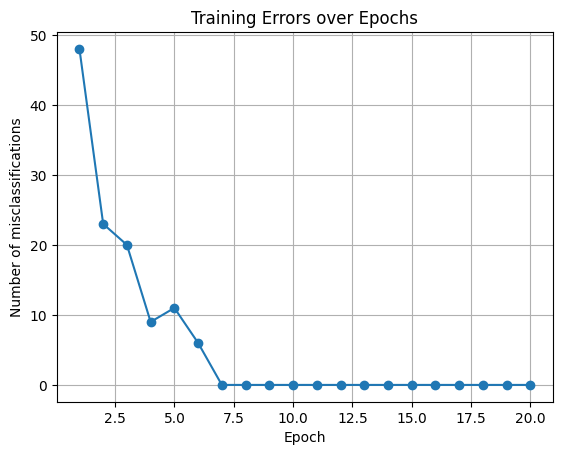

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. بارگذاری داده‌ها و انتخاب دو کلاس (0 و 1)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# فقط نمونه‌های 0 و 1 را انتخاب می‌کنیم
train_filter = np.where((train_labels == 0) | (train_labels == 1))
test_filter = np.where((test_labels == 0) | (test_labels == 1))

X_train = train_images[train_filter].reshape(-1, 784).astype('float32') / 255.0
y_train = train_labels[train_filter]
X_test = test_images[test_filter].reshape(-1, 784).astype('float32') / 255.0
y_test = test_labels[test_filter]

# تبدیل برچسب‌ها به -1 و 1
y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

# 2. تعریف کلاس پرسپترون ساده
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=20):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.errors_ = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else -1
                update = self.lr * (target - y_pred)
                if update != 0:
                    self.weights += update * xi
                    self.bias += update
                    errors += 1
            self.errors_.append(errors)
        return self

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)

# 3. آموزش مدل
perceptron = Perceptron(learning_rate=0.01, epochs=20)
perceptron.fit(X_train, y_train)

# 4. ارزیابی مدل
y_pred_train = perceptron.predict(X_train)
y_pred_test = perceptron.predict(X_test)

train_acc = np.mean(y_pred_train == y_train)
test_acc = np.mean(y_pred_test == y_test)
print(f'Accuracy on training set: {train_acc:.4f}')
print(f'Accuracy on test set: {test_acc:.4f}')

# 5. رسم نمودار خطا در هر epoch
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of misclassifications')
plt.title('Training Errors over Epochs')
plt.grid(True)
plt.show()
